In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# reading preprocessed data, containing attributes researchers identified as relevant
pdata =  pd.read_csv('processed.hungarian.data')
pdata2 =  pd.read_csv('processed.cleveland.data')
pdata3 =  pd.read_csv('processed.switzerland.data')
pdata4 =  pd.read_csv('processed.va.data')

pdata.columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'disease-likelihood']
pdata2.columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'disease-likelihood']
pdata3.columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'disease-likelihood']
pdata4.columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'disease-likelihood']

merge1=pd.concat([pdata, pdata2])
merge2=pd.concat([merge1, pdata3])
total_processed_data=pd.concat([merge2, pdata4])

# export dataset to be further used
total_processed_data.to_csv('total_processed_data.csv', index = False)

print(total_processed_data)


      age  sex   cp trestbps chol fbs restecg thalach exang oldpeak slope ca  \
0    29.0  1.0  2.0      120  243   0       0     160     0     0.0     ?  ?   
1    29.0  1.0  2.0      140    ?   0       0     170     0     0.0     ?  ?   
2    30.0  0.0  1.0      170  237   0       1     170     0     0.0     ?  ?   
3    31.0  0.0  2.0      100  219   0       1     150     0     0.0     ?  ?   
4    32.0  0.0  2.0      105  198   0       0     165     0     0.0     ?  ?   
..    ...  ...  ...      ...  ...  ..     ...     ...   ...     ...   ... ..   
194  54.0  0.0  4.0      127  333   1       1     154     0       0     ?  ?   
195  62.0  1.0  1.0        ?  139   0       1       ?     ?       ?     ?  ?   
196  55.0  1.0  4.0      122  223   1       1     100     0       0     ?  ?   
197  58.0  1.0  4.0        ?  385   1       2       ?     ?       ?     ?  ?   
198  62.0  1.0  2.0      120  254   0       2      93     1       0     ?  ?   

    thal  disease-likelihood  
0      ?

In [44]:
linecount=0
elementCount=0
totalList=[]
tempList=[]
with open("hungarian.data", "r") as f:
    for dataline in f:
        elements=dataline.strip().split(' ')
        for element in elements:
            elementCount+=1
            if(elementCount<69):
                if element!='':
                    tempList.append(float(element))
        linecount+=1
        if linecount==10:
            totalList.append(tempList.copy())
            tempList.clear()
            elementCount=0
            linecount=0
unprocessedDataFrame=pd.DataFrame(totalList, columns=["id", "ccf", "age", "sex", "painloc", "painexer", "relrest", "pncaden", "cp", "trestbps", "htn", "chol", "smoke", "cigs", "years", "fbs", "dm", "famhist", "restecg", "ekgmo", "ekgday", "ekgyr", "dig", "prop", "nitr", "pro", "diuretic", "proto", "thaldur", "thaltime", "met", "thalach", "thalrest", "tpeakbps", "tpeakbpd", "dummy", "trestbpd", "exang", "xhypo", "oldpeak", "slope", "rldv5", "rldv5e", "ca", "restckm", "exerckm", "restef", "restwm", "exeref", "exerwm", "thal", "thalsev", "thalpul", "earlobe", "cmo", "cday", "cyr", "num", "lmt", "ladprox", "laddist", "diag", "cxmain", "ramus", "om1", "om2", "rcaprox", "rcadist"])
print(unprocessedDataFrame)

68
         id  ccf   age  sex  painloc  painexer  relrest  pncaden   cp  \
0    1254.0  0.0  40.0  1.0      1.0       0.0      0.0     -9.0  2.0   
1    1255.0  0.0  49.0  0.0      1.0       0.0      0.0     -9.0  3.0   
2    1256.0  0.0  37.0  1.0      1.0       0.0      0.0     -9.0  2.0   
3    1257.0  0.0  48.0  0.0      1.0       1.0      1.0     -9.0  4.0   
4    1258.0  0.0  54.0  1.0      1.0       0.0      1.0     -9.0  3.0   
..      ...  ...   ...  ...      ...       ...      ...      ...  ...   
289  1053.0  0.0  48.0  0.0      0.0       0.0      0.0     -9.0  2.0   
290  1054.0  0.0  36.0  1.0      1.0       0.0      0.0     -9.0  2.0   
291  5001.0  0.0  48.0  1.0      0.0       0.0      0.0     -9.0  3.0   
292  5000.0  0.0  47.0  0.0      0.0       0.0      0.0     -9.0  2.0   
293  5002.0  0.0  53.0  1.0      1.0       1.0      1.0     -9.0  4.0   

     trestbps  ...  lmt  ladprox  laddist  diag  cxmain  ramus  om1  om2  \
0       140.0  ... -9.0     -9.0     -9.0  -

In [25]:
X = total_processed_data.drop('disease-likelihood', axis = 1)
y = total_processed_data['disease-likelihood']

print(len(X.index))
data_train, data_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(data_train)
print(y_train)

916
      age  sex   cp trestbps   chol  fbs restecg thalach exang oldpeak slope  \
169  70.0  1.0  3.0    160.0  269.0  0.0     0.0   112.0   1.0     2.9   2.0   
28   55.0  1.0  3.0        ?    228    0       1       ?     ?       ?     ?   
271  46.0  1.0  4.0    140.0  311.0  0.0     0.0   120.0   1.0     1.8   2.0   
184  61.0  1.0  3.0        ?    284    0       0       ?     ?       ?     ?   
54   68.0  1.0  4.0      138      0    0       0     130     1       3     2   
..    ...  ...  ...      ...    ...  ...     ...     ...   ...     ...   ...   
138  58.0  1.0  3.0      150    219    0       1     118     1       0     ?   
268  42.0  1.0  3.0    130.0  180.0  0.0     0.0   150.0   0.0     0.0   1.0   
104  61.0  1.0  4.0      120    282    0       1     135     1       4     3   
212  66.0  0.0  4.0    178.0  228.0  1.0     0.0   165.0   1.0     1.0   2.0   
176  64.0  1.0  4.0      130    258    1       2     130     0       0     ?   

      ca thal  
169  1.0  7.0  
28 

In [26]:
#Currently being worked on



In [159]:
# before working on the dataset, replace string '?' with NaN
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
df = pd.read_csv('total_processed_data.csv')

# relace '?'
df.replace('?', np.nan, inplace=True)

# check
print(df)


      age  sex   cp trestbps chol fbs restecg thalach exang oldpeak slope   
0    29.0  1.0  2.0      120  243   0       0     160     0     0.0   NaN  \
1    29.0  1.0  2.0      140  NaN   0       0     170     0     0.0   NaN   
2    30.0  0.0  1.0      170  237   0       1     170     0     0.0   NaN   
3    31.0  0.0  2.0      100  219   0       1     150     0     0.0   NaN   
4    32.0  0.0  2.0      105  198   0       0     165     0     0.0   NaN   
..    ...  ...  ...      ...  ...  ..     ...     ...   ...     ...   ...   
911  54.0  0.0  4.0      127  333   1       1     154     0       0   NaN   
912  62.0  1.0  1.0      NaN  139   0       1     NaN   NaN     NaN   NaN   
913  55.0  1.0  4.0      122  223   1       1     100     0       0   NaN   
914  58.0  1.0  4.0      NaN  385   1       2     NaN   NaN     NaN   NaN   
915  62.0  1.0  2.0      120  254   0       2      93     1       0   NaN   

      ca thal  disease-likelihood  
0    NaN  NaN                   0  
1  

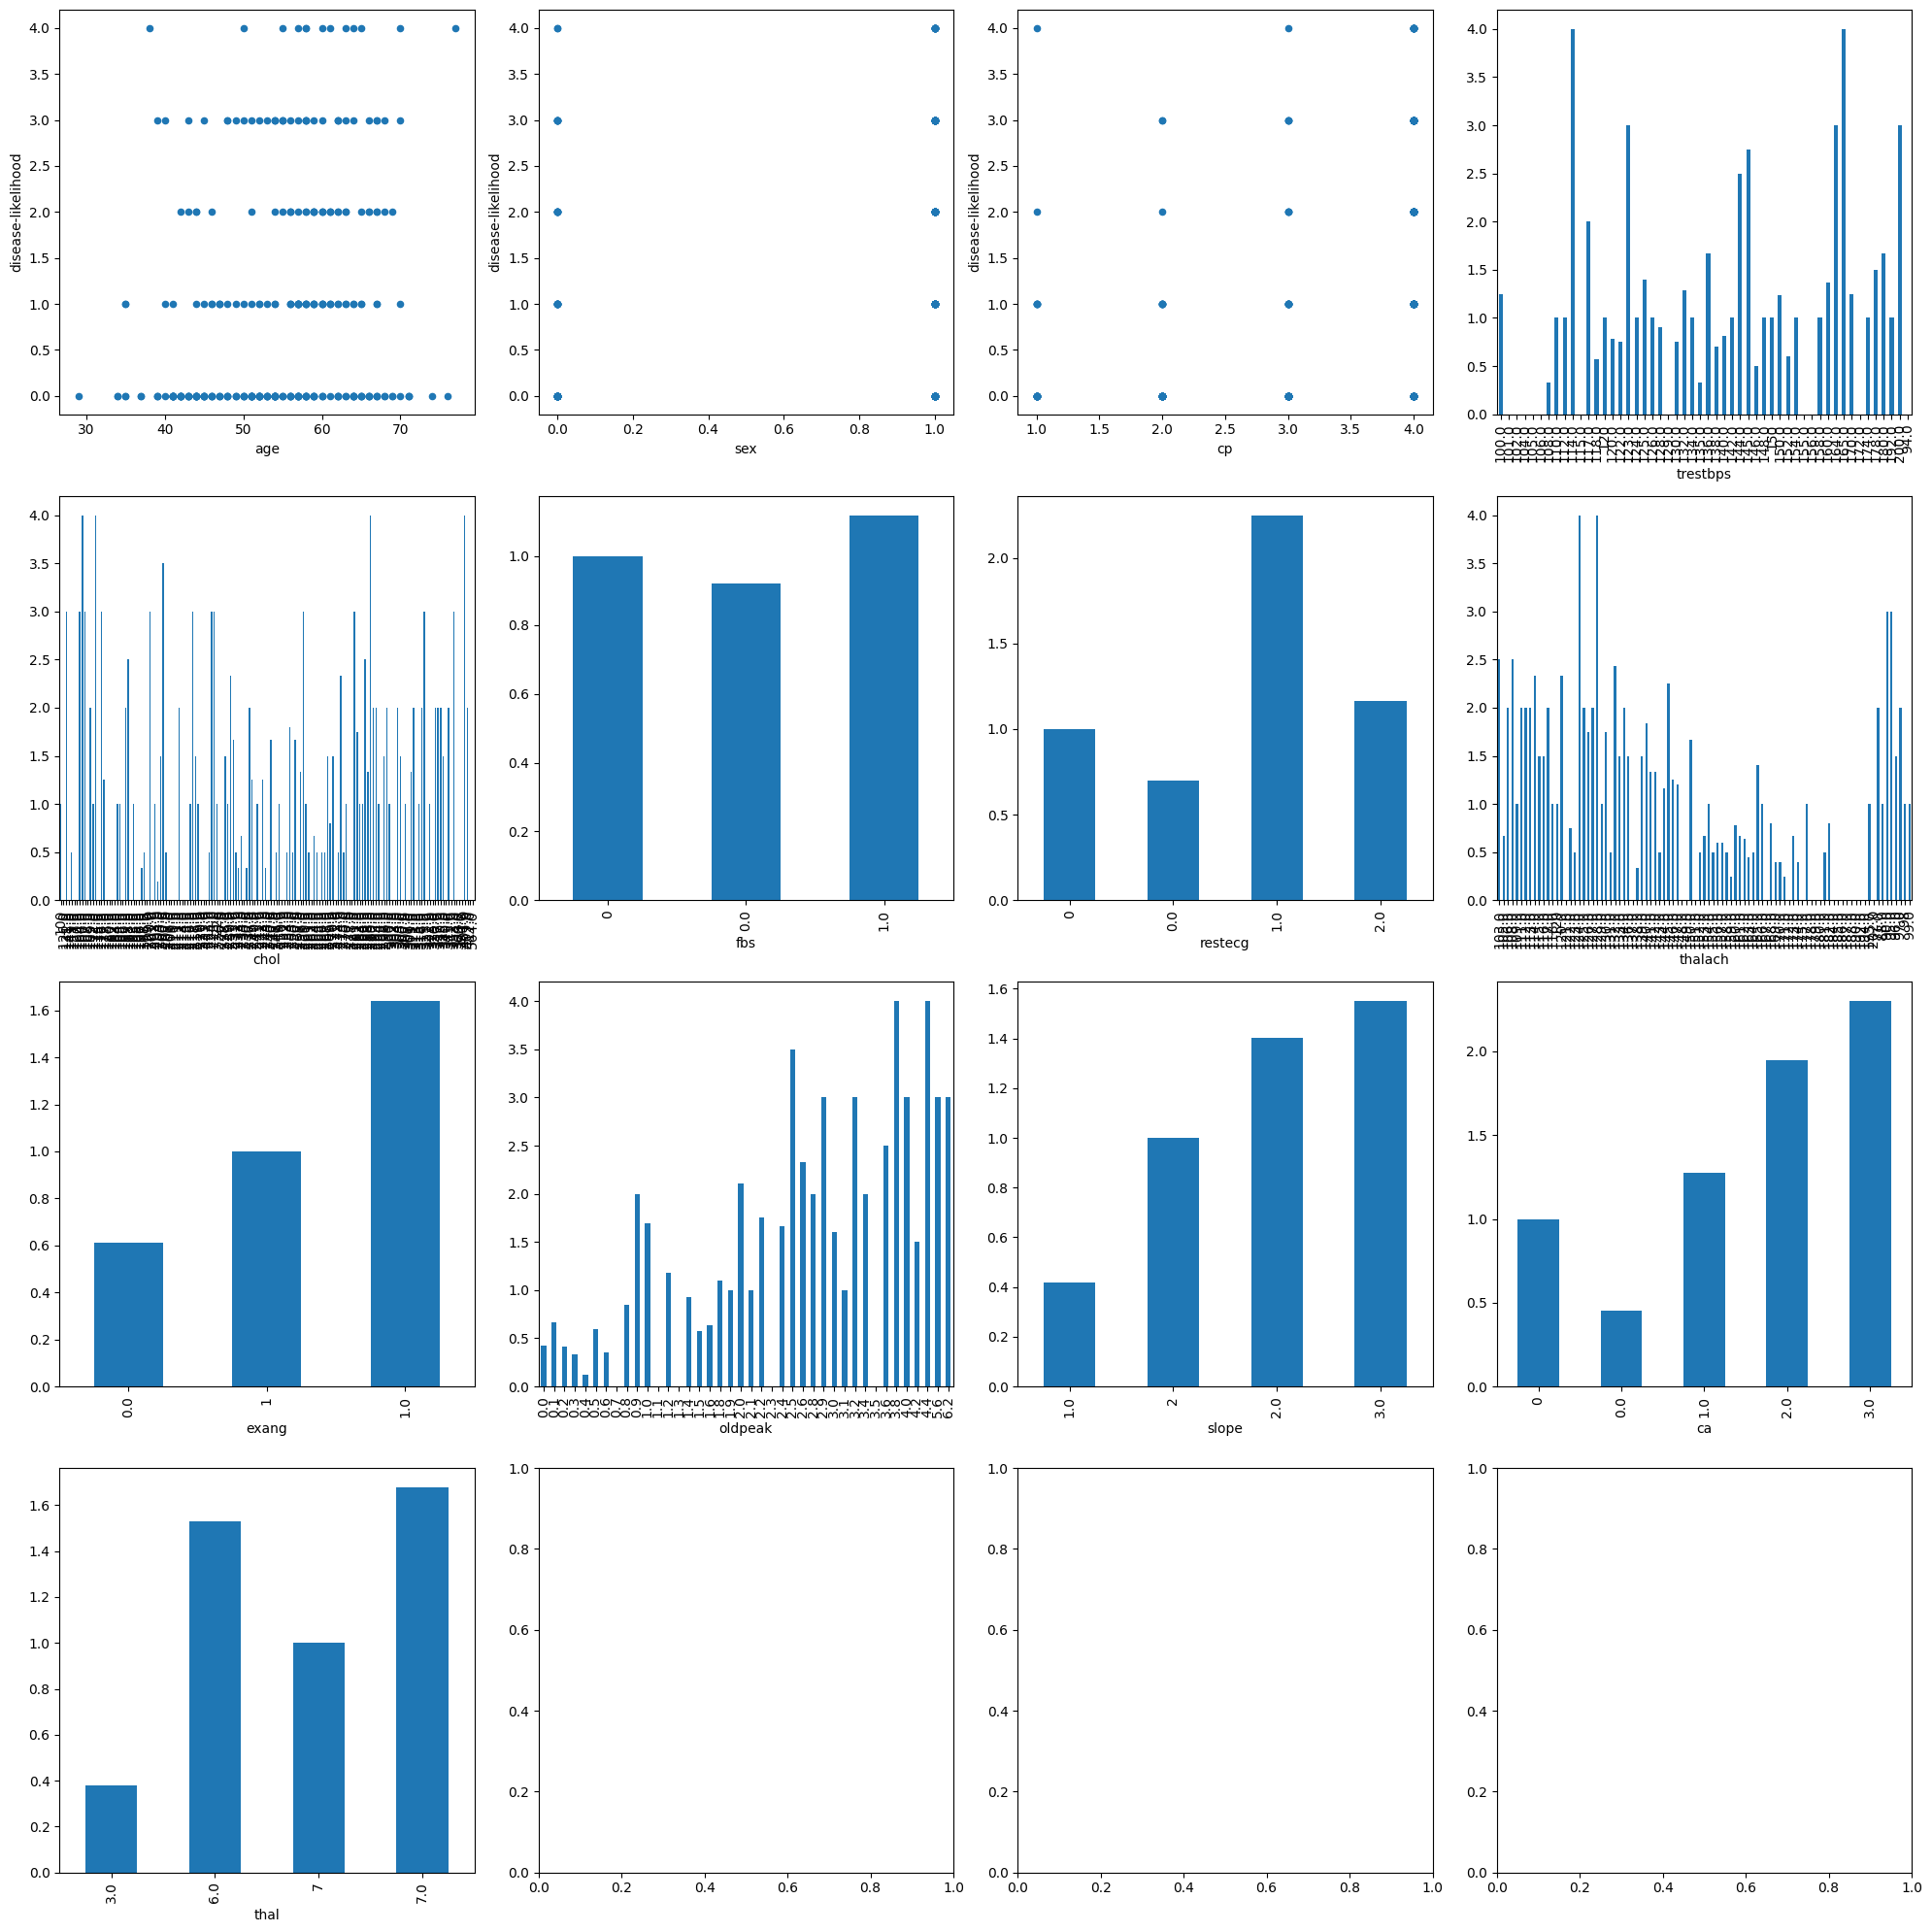

In [39]:
# visualize the relation between each independent to disease-likelihood

# Create a bar chart for each independent variable
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axs = axs.flatten()

for i, col in enumerate(df.columns[:-1]):
    if df[col].dtype == 'object':
        df.groupby(col)['disease-likelihood'].mean().plot(kind='bar', ax=axs[i])
    else:
        df.plot.scatter(x=col, y='disease-likelihood', ax=axs[i])


plt.tight_layout()
plt.show()

In [35]:
# linear regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load data and drop rows with missing values
df = df.dropna()

# Define the features (independent variables)
X = df.drop('disease-likelihood', axis = 1)

# Define the target variable (dependent variable)
y = df['disease-likelihood']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor object
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training set
rf.fit(X_train, y_train)

# Get the feature importances
importances = rf.feature_importances_

# Print the feature importances
for i, col in enumerate(X_train.columns):
    print(f"Feature: {col}, Importance: {importances[i]}")

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Calculate the testing MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Testing MSE: {mse}")

Feature: age, Importance: 0.05785565186604762
Feature: sex, Importance: 0.018151122608991228
Feature: cp, Importance: 0.13774321095143563
Feature: trestbps, Importance: 0.06609617319076264
Feature: chol, Importance: 0.07080168437326281
Feature: fbs, Importance: 0.0064102504399259
Feature: restecg, Importance: 0.014366339991199443
Feature: thalach, Importance: 0.1136244283789954
Feature: exang, Importance: 0.022368751704588147
Feature: oldpeak, Importance: 0.14178350134494686
Feature: slope, Importance: 0.020833616025391015
Feature: ca, Importance: 0.21646409694000238
Feature: thal, Importance: 0.11350117218445102
Testing MSE: 0.8169833333333333


In [267]:
# Feed Forward
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np

# Load data and drop rows with missing values
df = df.dropna()

# Define the features (independent variables)
X = df.drop('disease-likelihood', axis = 1)

# Define the target variable (dependent variable)
y = df['disease-likelihood']

# normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)

#splitting data into ratio 90:10
data_train, data_test, class_train, class_test = train_test_split(X, y, test_size=0.1)

mlp = MLPClassifier(solver = 'sgd', random_state = 42, activation = 'logistic', learning_rate_init = 0.2, batch_size = 256, hidden_layer_sizes = (12, 3), max_iter = 500, verbose = False)

mlp.fit(data_train, class_train)

pred = mlp.predict(data_test)

from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, r2_score

print("Accuracy : ", accuracy_score(class_test, pred))
print("MSE : ", mean_squared_error(class_test, pred))

# Display variable importance
coefficients = mlp.coefs_[0]
for i in range(X.shape[1]):
    print(f"{X.columns[i]}: {coefficients[i].mean()}")


Accuracy :  0.6666666666666666
MSE :  0.3333333333333333
age: -0.02768364617569655
sex: -0.12658624793095988
cp: -0.04834032066874446
trestbps: -0.11803562778682168
chol: -0.01833292378313488
fbs: -0.015293803157614414
restecg: -0.08005918134933514
thalach: 0.026744307013875795
exang: -0.029319867722577973
oldpeak: -0.03033716182882032
slope: -0.03789805947862646
ca: -0.06465476082423832
thal: -0.04139928246914825
